In [7]:
from seligator.main import Seligator
from seligator.prediction.tests import run_tests

sel = Seligator.load_model("saved_model_nometadata")
sel.model.cuda()
reader = sel.get_reader()
sel.model

INFO:allennlp.data.vocabulary:Loading token dictionary from saved_model_nometadata/vocabulary.
INFO:filelock:Lock 140421809780144 acquired on saved_model_nometadata/vocabulary/.lock
INFO:filelock:Lock 140421809780144 released on saved_model_nometadata/vocabulary/.lock
INFO:root:Fitting the BasisVectorConfiguration
/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
INFO:root:Dataset reader set with following categories: [msd], lemma_char, lemma
INFO:root:Indexer set for following categories: [msd], lemma_char, lemma
INFO:root:TSV READER uses following metadata encoding MetadataEncoding.IGNORE 


FeatureEmbeddingClassifier(
  (_loss): CrossEntropyLoss()
  (mixed_encoder): MixedEmbeddingEncoder(
    (_emb_dropout): Dropout(p=0.3, inplace=False)
    (features_embedder): FeatureAndTextEmbedder(
      (text_embedder): BasicTextFieldEmbedder(
        (token_embedder_lemma): Embedding()
        (token_embedder_lemma_char): TokenCharactersEncoder(
          (_embedding): TimeDistributed(
            (_module): Embedding()
          )
          (_encoder): TimeDistributed(
            (_module): LstmSeq2VecEncoder(
              (_module): LSTM(100, 150, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
            )
          )
          (_dropout): Dropout(p=0.3, inplace=False)
        )
      )
      (feature_embedder): Linear(in_features=52, out_features=20, bias=True)
    )
    (features_encoder): HierarchicalAttentionalEncoder(
      (gru): ModifiedPytorchSeq2VecWrapper(
        (_module): GRU(520, 64, batch_first=True, dropout=0.3, bidirectional=True)
      )
    

INFO:allennlp.training.util:Iterating over dataset


Evaluating


0it [00:00, ?it/s]

Evaluating: Predicting


/home/thibault/dev/est-lascivuum-non-est/seligator/prediction/tests.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  disp.figure_.show()


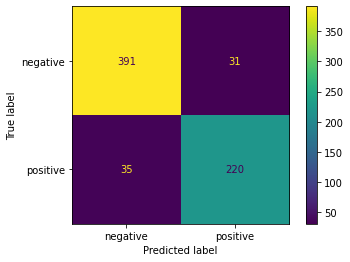

In [8]:
data, img = run_tests(
    "dataset/split/test.txt",
    dataset_reader=reader,
    model=sel.model
)

INFO:root:Dataset reader set with following categories: [msd], lemma_char, lemma
/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/allennlp/data/token_indexers/token_characters_indexer.py:55: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  warnings.warn(
INFO:root:Indexer set for following categories: [msd], lemma_char, lemma
INFO:root:TSV READER uses following metadata encoding MetadataEncoding.AS_CATEGORICAL 
/home/thibault/dev/est-lascivuum-non-est/seligator/models/classifier.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits)


In [9]:
from seligator.prediction.html import predictions_to_html

# Do Ausone
output = sel.predict_on_xml(
    "/home/thibault/dev/latin-lemmatized-texts/lemmatized/xml/urn:cts:latinLit:stoa0045.stoa003.perseus-lat2.xml",
     metadata={
        "Century": "4",
        "CitationTypes": "line",
        "Textgroup": "urn:cts:latinLit:stoa0045",
        "WrittenType": "versified"
})
with open("ausone-as-ausone.html", "w") as f:
    f.write(predictions_to_html(output, show_class=False))

# Same with Virgile
output = sel.predict_on_xml(
    "/home/thibault/dev/latin-lemmatized-texts/lemmatized/xml/urn:cts:latinLit:stoa0045.stoa003.perseus-lat2.xml",
     metadata={
        "Century": "-1",
        "CitationTypes": "poem,line",
        "Textgroup": "urn:cts:latinLit:phi0690",
        "WrittenType": "versified"
})
with open("ausone-as-virgile.html", "w") as f:
    f.write(predictions_to_html(output, show_class=False))
    
# Virgine Aeneid
output = sel.predict_on_xml(
    "/home/thibault/dev/latin-lemmatized-texts/lemmatized/xml/urn:cts:latinLit:phi0690.phi003.perseus-lat2.xml",
     metadata={
        "Century": "-1",
        "CitationTypes": "poem,line",
        "Textgroup": "urn:cts:latinLit:phi0690",
        "WrittenType": "versified"
})
with open("virgile-as-virgile.html", "w") as f:
    f.write(predictions_to_html(output, show_class=False))
    
# Martial as Martial
output = sel.predict_on_xml(
    "/home/thibault/dev/latin-lemmatized-texts/lemmatized/xml/urn:cts:latinLit:phi1294.phi002.perseus-lat2.xml",
     metadata={
        "Century": "1",
        "CitationTypes": "book,poem,line",
        "Textgroup": "urn:cts:latinLit:phi1294",
        "WrittenType": "versified"
})
with open("martial-as-martial.html", "w") as f:
    f.write(predictions_to_html(output, show_class=False))
    
# Martial as Cicero
output = sel.predict_on_xml(
    "/home/thibault/dev/latin-lemmatized-texts/lemmatized/xml/urn:cts:latinLit:phi1294.phi002.perseus-lat2.xml",
     metadata={
        "Century": "-1",
        "CitationTypes": "paragraph",
        "Textgroup": "urn:cts:latinLit:phi0474",
        "WrittenType": "prose"
})
with open("martial-as-cicero.html", "w") as f:
    f.write(predictions_to_html(output, show_class=False))

INFO:root:Dataset reader set with following categories: [msd], lemma_char, lemma
/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/allennlp/data/token_indexers/token_characters_indexer.py:55: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  warnings.warn(
INFO:root:Indexer set for following categories: [msd], lemma_char, lemma
INFO:root:TSV READER uses following metadata encoding MetadataEncoding.IGNORE 
/home/thibault/dev/est-lascivuum-non-est/seligator/models/classifier.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits)
INFO:root:Dataset reader set with following categories: [msd], lemma_char, lemma
INFO:root:Indexer set f